In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm

In [23]:
#Defining the dictionary for the variables that are kept constant 


def set_params(L, B_0, mu_0, rho_m, k_B,T,mu_bar, V_f): 
    
    return {'length': L, 'magnetic_field_strength': B_0, 'magnetic_moment': mu_0, 'particle_density': rho_m, 'boltzmann_constant':k_B,'temperature':T, 'number_density':mu_bar, 'characteristic_volume': V_f}

params = set_params(10,0.1,5.49*10**-23,1,1.38*10**-23,2000,3.902*10**-27,1) 



In [24]:
def A(params): 
    L = params['length']
    B_0 = params['magnetic_field_strength']
    mu_0 = params['magnetic_moment']
    rho_m = params['particle_density']
    
    k_B = params['boltzmann_constant']
    T = params['temperature']
    mu_bar = params['number_density']
    V_f = params['characteristic_volume']
    return np.sqrt((mu_0 * k_B * T)/ (12*np.pi*rho_m * mu_bar* V_f)) * L/B_0


print(A(params))



Radius = (10**-9, 10**-3, 1000)
rho = (10**-17, 1, 1000)

Rad_log = np.logspace(-9,-3,1000)

rho_log = np.logspace(-17,1,1000)



#Converting Radius and rho into a total 2D array 
Rad, Rho = np.meshgrid(Rad_log,rho_log)


Damping = (A(params))*Rho/((Rad))



3.209456703913777e-07


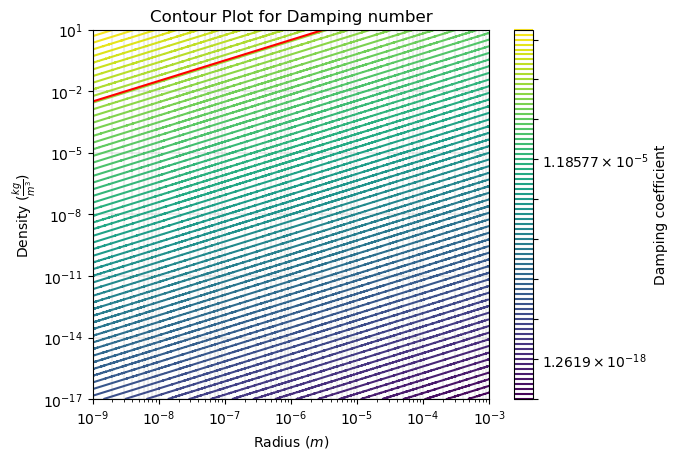

In [41]:
#Contour_plot_1 = plt.contourf(Rad,Rho, Knudsen,levels = [1], cmap = 'magma')
Damping_plot = np.where(Damping > 0, Damping, 1e-30)
vmin = Damping_plot.min()
vmax = Damping_plot.max()

Contour_plot = plt.contour(
    Rad,Rho, Damping, 
    levels = np.logspace(np.log10(vmin),np.log10(vmax),75), 
    #norm arguement tells you how the colour must be mapped 
    norm = LogNorm(), 
    cmap = 'viridis')
plt.colorbar(label = 'Damping coefficient')




Contour_plot3 = plt.contour(
    Rad,Rho, Damping, 
    levels = [1], 
    #norm arguement tells you how the colour must be mapped  
    colors = 'red')



plt.xlabel('Radius ($m$)')
plt.ylabel('Density ($\\frac{kg}{m^3}$)')
plt.xscale('log')
plt.yscale('log')





plt.title('Contour Plot for Damping number')

plt.grid(which= 'both', linewidth = 0.3)


plt.show()
